# Table of Contents for 4.9 Intro to Data Visualization with Python
    Import libraries, set path, import files (ords_prods_merge_newvariable_flags.pkl)
    Make checks (shape, columns, head)
    Create bar charts
        Orders_day_of_week counts
        Indexed by day of the week
        With a different color on each day saved as bar.  
        Export bar as bar_orders_dow.png
    Create histogram (frequency) of prices
    Create a scatterplot of prices (prices vs prices)
        Check for prices above 100: none, it was previously cleaned already
    Run histogram again with a larger bin, save as hist
    Export hist as hist_prices.png
    Create a sample 70/30
        Make a df_2 to pull from the small sample columns 'orders_day_of_week','prices'
        Create a line chart
        Export it as line_day_prices.png   

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set path

In [2]:
path = r'C:\Users\valev\Desktop\0325 Instacart Basket Analysis'

# Import files

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prods_merge_newvariable_flags.pkl' ))

In [4]:
df_ords_prods_merge.shape

(32404859, 24)

In [5]:
df_ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spent',
       'spending_flag', 'median_days_since_orders', 'order_frequency_flag'],
      dtype='object')

In [6]:
df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_days_since_orders,order_frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,1107,38259,2,1,11,...,Mid-range product,Regularly busy,Next_busiest_day,Most orders,4,New customer,7.163135,Low spender,30.0,Non-frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.800781,5319,196224,65,1,14,...,Mid-range product,Regularly busy,Next_busiest_day,Most orders,99,Loyal customer,5.342874,Low spender,1.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.800781,7540,138499,8,0,14,...,Mid-range product,Busiest day,Busiest day,Most orders,23,Regular customer,7.469755,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.800781,9228,79603,2,2,10,...,Mid-range product,Regularly busy,Regularly busy,Most orders,5,New customer,6.985924,Low spender,30.0,Non-frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.800781,9273,50005,1,1,15,...,Mid-range product,Regularly busy,Next_busiest_day,Most orders,22,Regular customer,7.493308,Low spender,7.0,Frequent customer


# Creating bar charts

<Axes: xlabel='orders_day_of_week'>

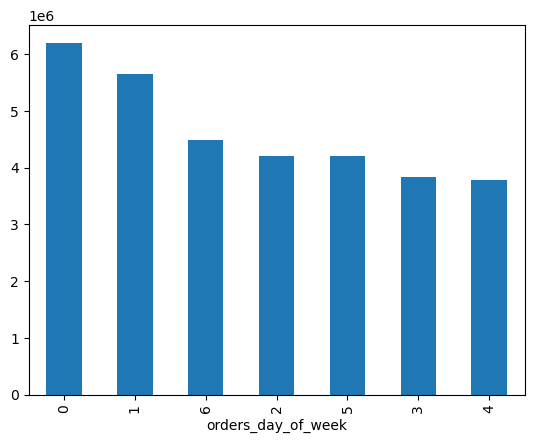

In [7]:
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

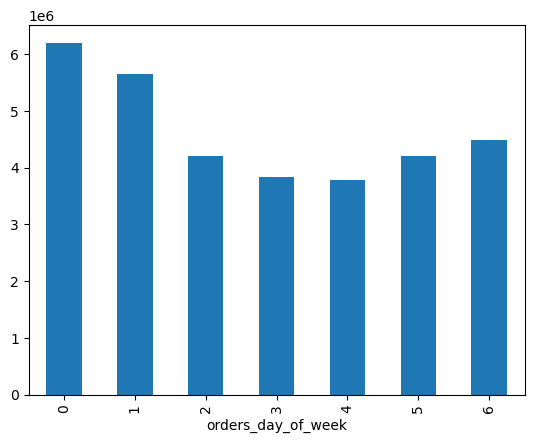

In [8]:
# index by day of week
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Exporting charts

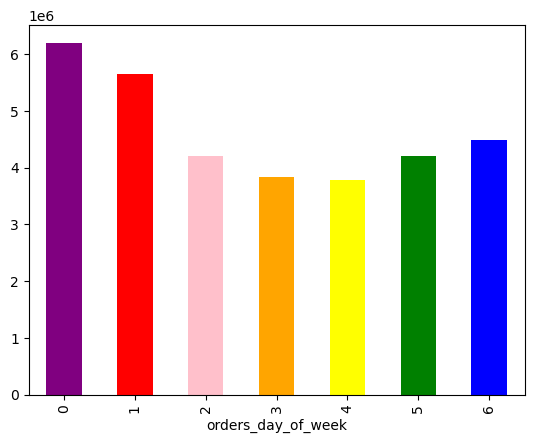

In [9]:
# Save within the bar object, and you’ll be able to access it any time you like by calling bar.figure.
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# Export as an image outside of Jupyter
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Create a histogram of prices

<Axes: ylabel='Frequency'>

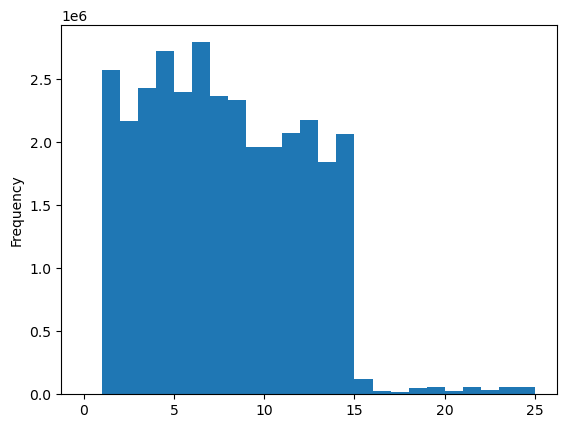

In [11]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

## Run a scatterplot

<Axes: xlabel='prices', ylabel='prices'>

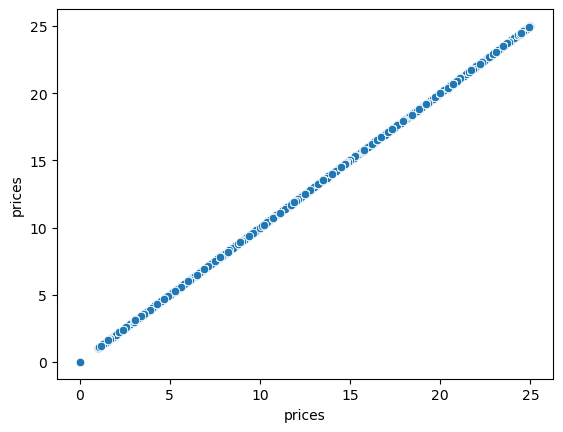

In [12]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [13]:
# Check for rows with prices of above 100
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_days_since_orders,order_frequency_flag


In [14]:
# Now check for above 20 - just curious
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 20]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_days_since_orders,order_frequency_flag
12787,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.500000,12980,160701,3,6,18,...,High-range product,Regularly busy,Regularly busy,Average orders,14,Regular customer,7.677605,Low spender,7.0,Frequent customer
12788,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.500000,14117,146872,15,4,17,...,High-range product,Least busy,Least busy,Average orders,99,Loyal customer,8.892600,Low spender,2.0,Frequent customer
12789,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.500000,74733,32454,13,0,13,...,High-range product,Busiest day,Busiest day,Most orders,22,Regular customer,8.704820,Low spender,15.0,Regular customer
12790,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.500000,169712,96093,13,5,16,...,High-range product,Regularly busy,Regularly busy,Average orders,37,Regular customer,8.158022,Low spender,12.0,Regular customer
12791,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.500000,189782,170178,18,4,19,...,High-range product,Least busy,Least busy,Average orders,45,Loyal customer,7.906763,Low spender,7.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32300502,49651,Beef Brisket,122,12,20.703125,2740722,178645,4,2,8,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,8.117578,Low spender,30.0,Non-frequent customer
32300503,49651,Beef Brisket,122,12,20.703125,2824226,194671,22,5,10,...,High-range product,Regularly busy,Regularly busy,Most orders,30,Regular customer,8.431551,Low spender,8.0,Frequent customer
32300504,49651,Beef Brisket,122,12,20.703125,2948592,155910,18,5,12,...,High-range product,Regularly busy,Regularly busy,Most orders,47,Loyal customer,7.873362,Low spender,3.0,Frequent customer
32300505,49651,Beef Brisket,122,12,20.703125,2988451,84692,20,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,28,Regular customer,8.207258,Low spender,4.0,Frequent customer


## Run histogram again with bin=70

<Axes: ylabel='Frequency'>

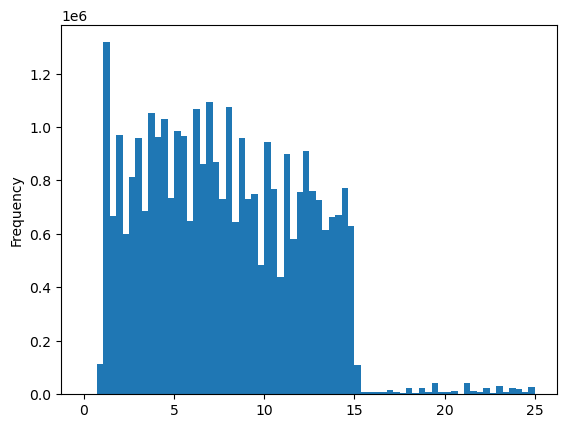

In [15]:
df_ords_prods_merge['prices'].plot.hist(bins = 70)

# Exporting Histogram

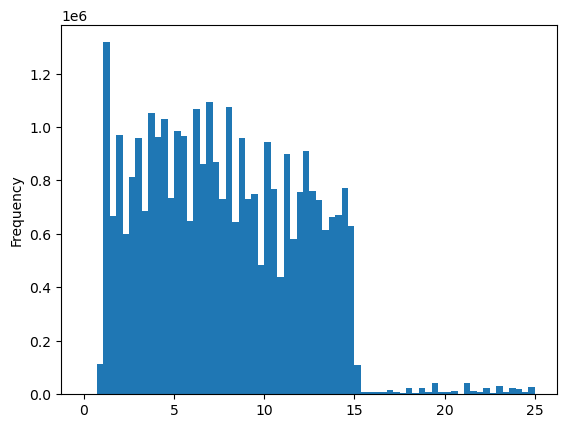

In [16]:
# Save within a hist
hist = df_ords_prods_merge['prices'].plot.hist(bins=70)

In [17]:
# Export as an image outside of Jupyter
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Creating Line Charts - by SAMPLING

In [18]:
# Set the seed
np.random.seed(5)

In [19]:
# Create the list of True or False values to test the random sample
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [20]:
# Store 70% in the dataframe big 
big = df_ords_prods_merge[dev]

In [21]:
# Store 30% in the dataframe small
small = df_ords_prods_merge[~dev]

In [22]:
# Check len
len(df_ords_prods_merge)

32404859

In [23]:
#Check against big + small
len(big) + len(small)

32404859

# Make a df_2 to include only the columns to plot

In [24]:
df_2 = small[['orders_day_of_week','prices']]

In [25]:
df_2.shape

(9721931, 2)

In [26]:
df_2.head()

,orders_day_of_week,prices
1,1,5.800781
3,2,5.800781
6,1,5.800781
11,2,5.800781
14,4,5.800781


### why are all prices the same... I ran 30 rows, same prices?

# Create the chart

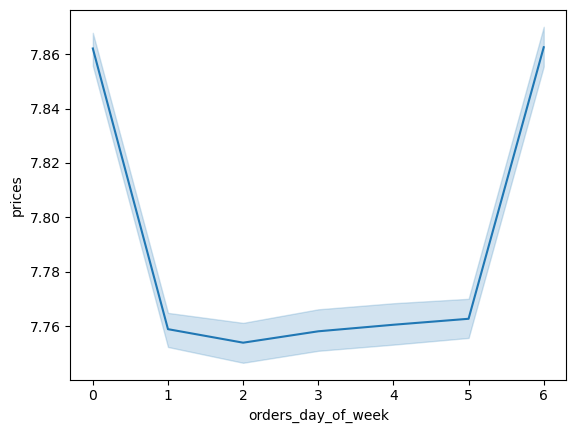

In [27]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [28]:
# Export 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_day_prices.png'))